In [1]:
# pip install pystokes

## Example 1 : sedimentation of two particles


In [2]:

## import pystokes
import pystokes


## import numpy and matplotlib
import numpy as np, matplotlib.pyplot as plt

## Velocity of one sedimenting sphere

$$\mathbf{V} =\mu^T_0\,\mathbf{F}
$$

It is useful to note that

$$
\mu_0^T  =\frac{1}{6\pi\eta b}
$$

## Velocity of $N$ sedimenting spheres

$$\mathbf{V}_1 =\mu^T_{11}\cdot\mathbf{F}_1+\boldsymbol \mu^{TT}_{12}\cdot\mathbf{F}_2,$$

$$\mathbf{V}_2 =\mu^T_{22}\cdot\mathbf{F}_2+\boldsymbol \mu^{TT}_{21}\cdot\mathbf{F}_1,$$


Here, we have defined

$$\boldsymbol \mu^{TT}_{12} = \boldsymbol {G} (\boldsymbol{R}_1-\boldsymbol{R}_2). $$

Here $\boldsymbol R_i$ is the location of the $i$th particle and $\boldsymbol {G}$ is a tensor of rank 2. It is given as:

$$
G_{\alpha\beta}=\frac{1}{8\pi\eta}\left(\frac{\delta_{\alpha\beta}}{r_{12}}
+\frac{(r_{12})_{\alpha}(r_{12})_{\beta}}{r^3_{12}}\right)
$$

It is useful to note that

$$
\boldsymbol\mu_{11}^{TT} =\mu_0^T \, \mathbf I=\frac{1}{6\pi\eta b}\mathbf I
$$

Here $\mathbf I$ is the identity tensor. We will assume spheres of equal sizes. Thus,

$$
\boldsymbol\mu_{ii}^{TT} =\mu_0^T \, \mathbf I=\frac{1}{6\pi\eta b}\mathbf I
$$

## Velocity of $N$ sedimenting spheres

$$\mathbf{V}_i =\sum_j \boldsymbol \mu^{TT}_{ij}\cdot\mathbf{F}_j,$$

The above is the quantity which PyStokes compute when you call `mobilityTT(v, r, F)`.

In [3]:
# particle radius, fluid viscosity, and number of particles
b, eta, N = 1.0, 1.0/(6.0*np.pi), 1

f0=-1. ## stength of the force


#initialise position,  and body force on the colloid
r, F = np.array([0.0, 0.0, 0.0]),  np.array([0.0, 0.0, f0])

In [4]:
# instantiate the RBM(Rigid body motio) class
rbm = pystokes.unbounded.Rbm(radius=b, particles=N, viscosity=eta)

In [5]:
v = np.array([0.0, 0.0, 0.0])

print (v)
v=v*0
rbm.mobilityTT(v, r, F)
print (v)


[0. 0. 0.]
[ 0.  0. -1.]


## Simulation of two sedimenting colloidal spheres

In [6]:
N=2

# instantiate the library class
rbm = pystokes.unbounded.Rbm(radius=b, particles=N, viscosity=eta)

In [7]:
r = np.zeros(3*N)
F = np.zeros(3*N)
v = np.zeros(3*N)
### Data strucutre: xx... of all particles... y components of all particles... z component of all particle

## Force in z-direction
F[2*N:3*N]=f0

## Initial position
r[0], r[1] = -5, 5.    ## x position
r[4], r[5] = 0., 0.

In [8]:
print (v)
rbm.mobilityTT(v, r, F)
print (v)


[0. 0. 0. 0. 0. 0.]
[ 0.      0.      0.      0.     -1.0755 -1.0755]


In [9]:
Nt = int(1e4) ## number of time points
dt = 0.01

xt1 = np.zeros(Nt+1)
zt1 = np.zeros(Nt+1)
xt2 = np.zeros(Nt+1)
zt2 = np.zeros(Nt+1)



r = np.zeros(3*N)
r[0], r[1] = -1.5, 1.5  ## x position
r[4], r[5] = -0.5, 0

xt1[0], xt2[0] = r[0], r[1]
zt1[0], zt2[0] = r[4], r[5]


for i in range(Nt):
  v=v*0
  F=F*0
  F[2*N:3*N]=f0
  rbm.mobilityTT(v, r, F)

  xt1[i+1] = xt1[i] + v[0]*dt
  xt2[i+1] = xt2[i] + v[1]*dt

  zt1[i+1] = zt1[i] + v[4]*dt
  zt2[i+1] = zt2[i] + v[5]*dt

  r[0] = xt1[i+1]
  r[1] = xt2[i+1]
  r[4] = zt1[i+1]
  r[5] = zt2[i+1]


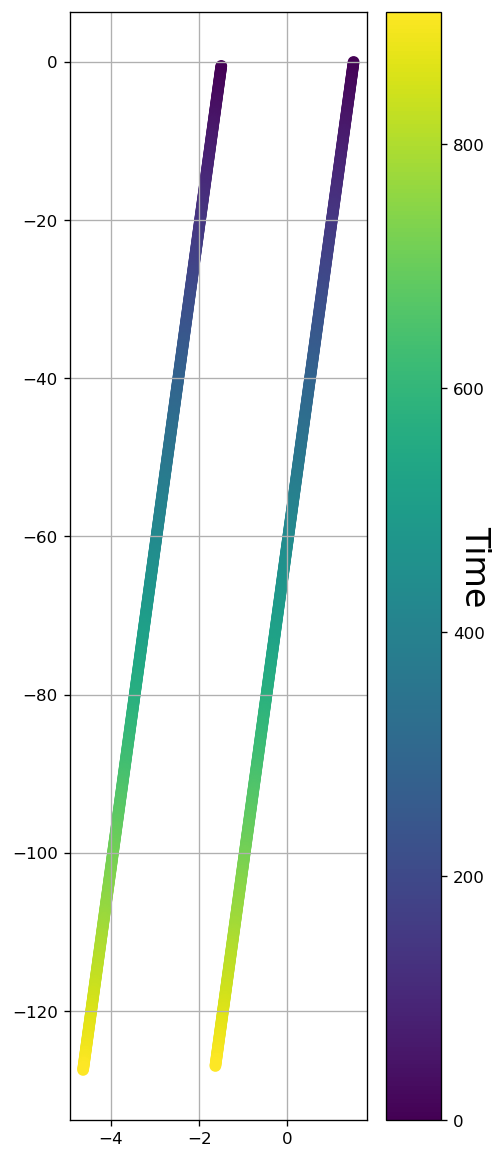

In [10]:
fig = plt.figure(figsize=(4, 12), dpi=120);

dd=11
plt.scatter(xt1[::dd], zt1[::dd], c=np.arange(xt1[::dd].size))
plt.scatter(xt2[::dd], zt2[::dd], c=np.arange(xt1[::dd].size))

cbar=plt.colorbar(); cbar.ax.set_ylabel('Time', rotation=270, fontsize=20)
plt.grid()

## Sedimentation of three spheres

In [11]:
N=3 # number of particle

# instantiate the library
rbm = pystokes.unbounded.Rbm(radius=b, particles=N, viscosity=eta)
forces = pystokes.forceFields.Forces(particles=N)

In [12]:

r = np.zeros(3*N)
F = np.zeros(3*N)
v = np.zeros(3*N)

F[2*N:3*N]=f0

Nt = int(1e4) ## number of time points
dt = 0.01

xt1 = np.zeros(Nt+1)
zt1 = np.zeros(Nt+1)
xt2 = np.zeros(Nt+1)
zt2 = np.zeros(Nt+1)
xt3 = np.zeros(Nt+1)
zt3 = np.zeros(Nt+1)

print (F, np.min(F) )


[ 0.  0.  0.  0.  0.  0. -1. -1. -1.] -1.0


In [13]:
r[0], r[1], r[2]           = -1.2, 1.2, 3.6  ## x position
r[2*N], r[2*N+1], r[2*N+2] = 1.1, 1, 2

xt1[0], xt2[0], xt3[0] = r[0], r[1], r[2]
zt1[0], zt2[0], zt3[0] = r[2*N], r[2*N+1], r[2*N+2]

print (v, F)
rbm.mobilityTT(v, r, F)
print (v, F)

[0. 0. 0. 0. 0. 0. 0. 0. 0.] [ 0.  0.  0.  0.  0.  0. -1. -1. -1.]
[-0.01699902 -0.06362742 -0.09759732  0.          0.          0.
 -1.51130252 -1.69561409 -1.50960133] [ 0.  0.  0.  0.  0.  0. -1. -1. -1.]


In [14]:
for i in range(Nt):
  v=v*0
  F=F*0
  F[2*N:3*N]=f0
  rbm.mobilityTT(v, r, F)

  xt1[i+1] = xt1[i] + v[0]*dt
  xt2[i+1] = xt2[i] + v[1]*dt
  xt3[i+1] = xt3[i] + v[2]*dt

  zt1[i+1] = zt1[i] + v[2*N]*dt
  zt2[i+1] = zt2[i] + v[2*N+1]*dt
  zt3[i+1] = zt3[i] + v[2*N+2]*dt

  r[0] = xt1[i+1]
  r[1] = xt2[i+1]
  r[2] = xt3[i+1]
  r[2*N]   = zt1[i+1]
  r[2*N+1] = zt2[i+1]
  r[2*N+2] = zt3[i+1]

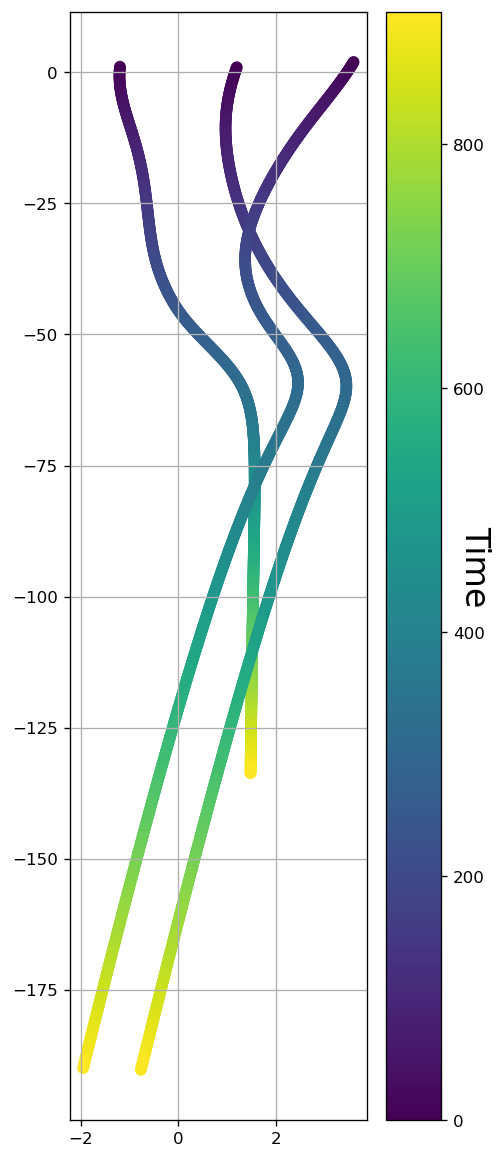

In [15]:
fig = plt.figure(figsize=(4, 12), dpi=120);

dd=11
plt.scatter(xt1[::dd], zt1[::dd], c=np.arange(xt1[::dd].size))
plt.scatter(xt2[::dd], zt2[::dd], c=np.arange(xt1[::dd].size))
plt.scatter(xt3[::dd], zt3[::dd], c=np.arange(xt1[::dd].size))

cbar=plt.colorbar(); cbar.ax.set_ylabel('Time', rotation=270, fontsize=20)
plt.grid()